In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import requests
import config 
from api_keys import api_key
import geopandas as gpd
import plotly.express as px

In [2]:
# Read in dataframe
df = pd.read_csv('../Dataset/TEDSA_PUF_2020.csv')

# Data columns
df.columns

# Data header
df.head()

# Display basic info
df.info()

# Null values
df.isnull().sum()

# If we need to drop any values 
df_cleaned_rows = df.dropna()

# Stats summary
df.describe()

# Duplicates? 
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416357 entries, 0 to 1416356
Data columns (total 62 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   ADMYR                1416357 non-null  int64
 1   CASEID               1416357 non-null  int64
 2   STFIPS               1416357 non-null  int64
 3   CBSA2010             1416357 non-null  int64
 4   EDUC                 1416357 non-null  int64
 5   MARSTAT              1416357 non-null  int64
 6   SERVICES             1416357 non-null  int64
 7   DETCRIM              1416357 non-null  int64
 8   NOPRIOR              1416357 non-null  int64
 9   PSOURCE              1416357 non-null  int64
 10  ARRESTS              1416357 non-null  int64
 11  EMPLOY               1416357 non-null  int64
 12  METHUSE              1416357 non-null  int64
 13  PSYPROB              1416357 non-null  int64
 14  PREG                 1416357 non-null  int64
 15  GENDER               1416357 non

0

In [3]:
## Display unique values


# Gender
gender = {1: 'Male', 2: 'Female', -9: 'Unknown'}

    # New coulmn named Gender_Label
df['GENDER_LABEL'] = df['GENDER'].map(gender)

gender_count = df['GENDER_LABEL'].value_counts()
    
    # Print
print(f'The unique Male and Female values are: {gender_count}!')

The unique Male and Female values are: GENDER_LABEL
Male       918299
Female     497175
Unknown       883
Name: count, dtype: int64!


In [4]:
# Ethnicity
ethnicity = {1: 'Puerto Rican', 2: 'Mexican', 3: 'Cuban', 4: 'Not Hispanic or Latino', 5: 'Hispanic or Latino', -9: 'Unknown'}

    # New column named Ethnicity_Label
df['ETHNICITY_LABEL'] = df['ETHNIC'].map(ethnicity)

ethnicity_count = df['ETHNICITY_LABEL'].value_counts()

    # Print
print(f'The unique ethnicity values are: {ethnicity_count}!')

The unique ethnicity values are: ETHNICITY_LABEL
Not Hispanic or Latino    1153503
Unknown                     63676
Mexican                     59291
Puerto Rican                48170
Cuban                       46199
Hispanic or Latino          45518
Name: count, dtype: int64!


In [5]:
# Age
age = {1: '12-14', 2: '15-17', 3: '18-20', 4: '21-24', 5: '25-29', 6: '30-34', 7: '35-39', 8: '40-44', 9: '45-49', 10: '50-54', 11: '55-64', 12: '65+'}

    # New column named Age_Label
df['AGE_LABEL'] = df['AGE'].map(age)

age_count = df['AGE_LABEL'].value_counts()

    # Print
print(f'The unique age values are: {age_count}!')

The unique age values are: AGE_LABEL
30-34    252021
25-29    223641
35-39    213290
40-44    154807
55-64    143172
45-49    117886
50-54    112989
21-24    102090
18-20     37669
15-17     28110
65+       24028
12-14      6654
Name: count, dtype: int64!


In [6]:
# Location by region
region = {0: 'US jurisdiction', 1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West'}

    # New column named Location_by_region
df['Location_by_region'] = df['REGION'].map(region)

location_region = df['Location_by_region'].value_counts()

    # Print
print(f'The unique region values are: {location_region}!')

The unique region values are: Location_by_region
Northeast          445033
West               363124
Midwest            303605
South              303333
US jurisdiction      1262
Name: count, dtype: int64!


In [7]:
# Location by division
division = {0: 'US jurisdiction', 1: 'New England', 2: 'Middle Atlantic', 3: 'East North Central', 4: 'West North Central', 5: 'South Atlantic', 6: 'East South Central', 7: 'West South Central', 8: 'Mountain', 9: 'Pacific'}

    # New column named Location_by_division
df['Location_by_division'] = df['DIVISION'].map(division)

location_division = df['Location_by_division'].value_counts()

    # Print
print(f'The unique division values are: {location_division}!')

The unique division values are: Location_by_division
Middle Atlantic       306177
Mountain              239269
South Atlantic        176039
East North Central    163748
West North Central    139857
New England           138856
Pacific               123855
West South Central     70429
East South Central     56865
US jurisdiction         1262
Name: count, dtype: int64!


In [8]:
# Location by state
states = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 72: 'Puerto Rico'}

    # New column named Location_by_state
df['Location_by_state'] = df['STFIPS'].map(states)

location_state = df['Location_by_state'].value_counts()

    # Print
print(f'The unique state values are: {location_state}!')

The unique state values are: Location_by_state
New York                201573
Arizona                 144377
California              116891
New Jersey               81368
Colorado                 69727
Michigan                 64535
Massachusetts            63927
Minnesota                50673
Connecticut              48395
North Carolina           42046
Florida                  41846
Illinois                 36211
Georgia                  33649
Texas                    33272
Missouri                 26816
Iowa                     24120
Indiana                  23721
Pennsylvania             23266
South Carolina           22149
Ohio                     21386
Virginia                 19528
Kentucky                 18467
Wisconsin                17908
Tennessee                16954
South Dakota             15318
Alabama                  14779
Rhode Island             13781
Oklahoma                 13554
Louisiana                12812
Delaware                 12293
Utah                   

In [9]:
# Primary drug preference
drugs = {1: 'None', 2: 'Alcohol', 3: 'Cocaine', 4: 'Marijuana', 5: 'Heroin', 6: 'Methadone', 7: 'Opiates', 8: 'PCP', 9: 'Hallucinogens', 10: 'Methamphetamine', 11: 'Other amphetamines', 12: 'Other stimulants', 13: 'Benzodiazepines', 14: 'Tranquilizers', 15: 'Barbiturates', 16: 'Sedatives', 17: 'Inhalants', 18: 'Over-the-counter medications', 19: 'Other drugs', -9 : 'Unknown'}

    # New column named Primary_Drug_Preference
df['Primary_Drug_Preference'] = df['SUB1'].map(drugs)

primary_drugs = df['Primary_Drug_Preference'].value_counts()

    # Print
print(f'The unique values of primary drug preference are: {primary_drugs}!')

# Save cleaned data to a new CSV file
df.to_csv('../Dataset/cleaned_data.csv', index=False)

The unique values of primary drug preference are: Primary_Drug_Preference
Alcohol                         442014
Heroin                          292126
Methamphetamine                 167722
Unknown                         139822
Marijuana                       139481
Opiates                          87200
Cocaine                          71725
None                             33568
Benzodiazepines                  13679
Other amphetamines                9367
Other drugs                       6593
PCP                               3692
Other stimulants                  2224
Hallucinogens                     1899
Methadone                         1714
Sedatives                         1471
Barbiturates                       752
Inhalants                          696
Over-the-counter medications       493
Tranquilizers                      119
Name: count, dtype: int64!


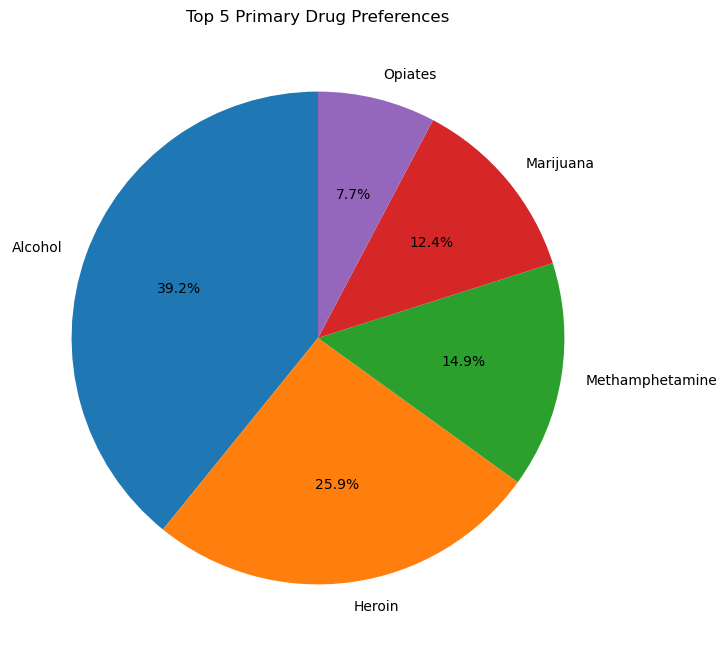

In [42]:
# Pie chart

# Select the top 5 drugs
top_drugs = df['Primary_Drug_Preference'].value_counts().head(6).index

# Filter the dataframe for the top 5 drugs
df_top_drugs = df[(df['Primary_Drug_Preference'].isin(top_drugs)) & (df['Primary_Drug_Preference'] != 'Unknown')]

# Pie chart for the distribution of the top 5 drugs
plt.figure(figsize=(8, 8))
top_drug_distribution = df_top_drugs['Primary_Drug_Preference'].value_counts()
top_drug_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Primary Drug Preferences')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
# REGION

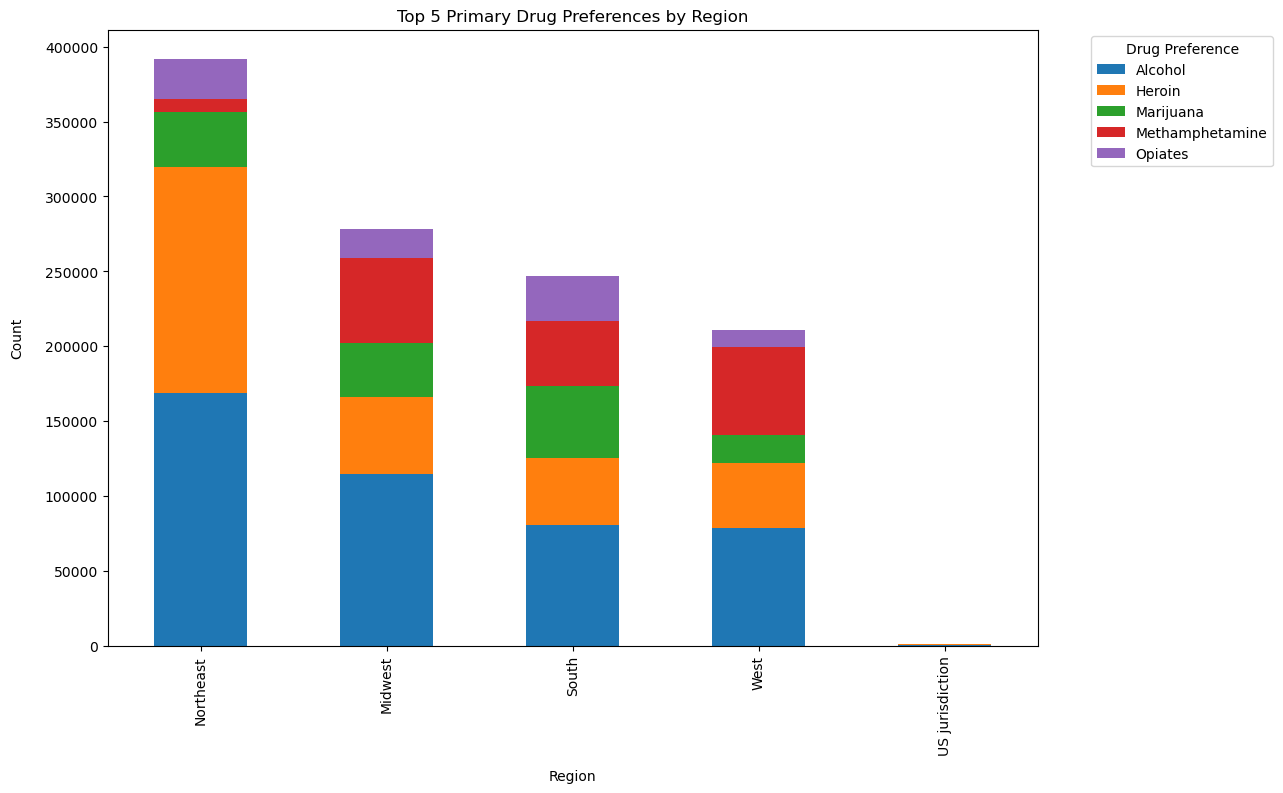

In [62]:
# Select the top 5 drugs
top_drugs = df['Primary_Drug_Preference'].value_counts().head(6).index

# Filter the dataframe for the top 5 drugs
df_top_drugs = df[(df['Primary_Drug_Preference'].isin(top_drugs)) & (df['Primary_Drug_Preference'] != 'Unknown')]

# Group by region and drug preference
grouped_data = df_top_drugs.groupby(['Location_by_region', 'Primary_Drug_Preference']).size().unstack(fill_value=0)

# Sort by region
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Bar chart
grouped_data.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Top 5 Primary Drug Preferences by Region')
plt.xlabel('Region', labelpad = 10)
plt.ylabel('Count', labelpad =15)
plt.legend(title='Drug Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



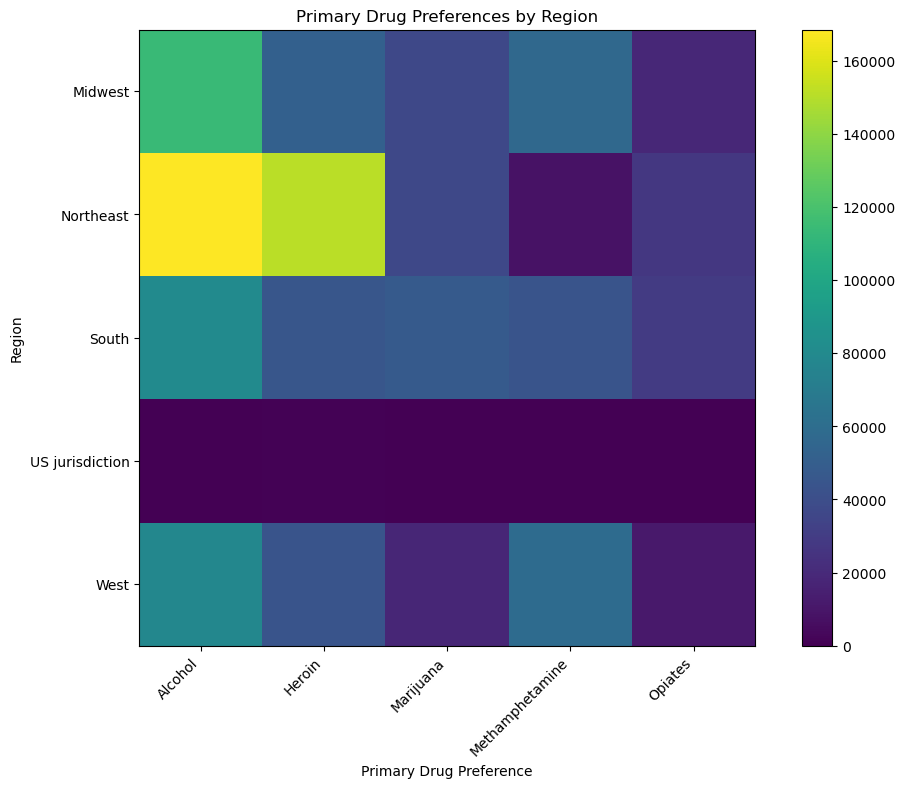

In [43]:
# Heatmap
top_drugs = df['Primary_Drug_Preference'].value_counts().head(6).index

# Filter the dataframe for the top 5 drugs and exclude 'Unknown'
df_top_drugs = df[(df['Primary_Drug_Preference'].isin(top_drugs)) & (df['Primary_Drug_Preference'] != 'Unknown')]

# Create a pivot table for the heatmap
heatmap_data = df_top_drugs.pivot_table(index='Location_by_region', columns='Primary_Drug_Preference', aggfunc='size', fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.imshow(heatmap_data, cmap='viridis', interpolation='nearest')

# Set axis labels and title
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns, rotation=45, ha='right')
ax.set_yticklabels(heatmap_data.index)
ax.set_xlabel('Primary Drug Preference')
ax.set_ylabel('Region')
ax.set_title('Primary Drug Preferences by Region')

# Add colorbar
cbar = fig.colorbar(cax)

plt.show()

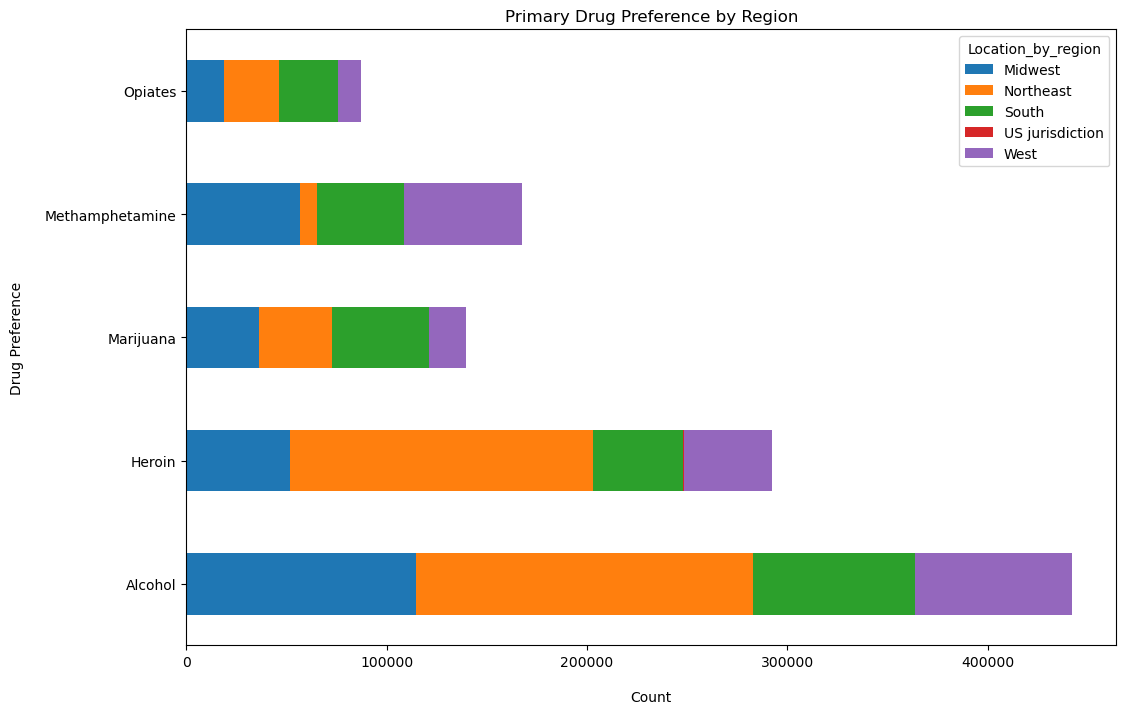

In [93]:
# Select the top 6 drugs
top_drugs = df['Primary_Drug_Preference'].value_counts().head(6).index

# Filter the dataframe for the top 6 drugs and exclude 'Unknown'
df_top_drugs = df[(df['Primary_Drug_Preference'].isin(top_drugs)) & (df['Primary_Drug_Preference'] != 'Unknown')]

# Horizontal Stacked Bar Chart
df_top_drugs.groupby(['Primary_Drug_Preference', 'Location_by_region']).size().unstack().plot(kind='barh', stacked=True, figsize=(12, 8))

plt.title("Primary Drug Preference by Region")
plt.xlabel("Count", labelpad=15)
plt.ylabel("Drug Preference", labelpad=15)
plt.show()

In [ ]:
# DIVISION

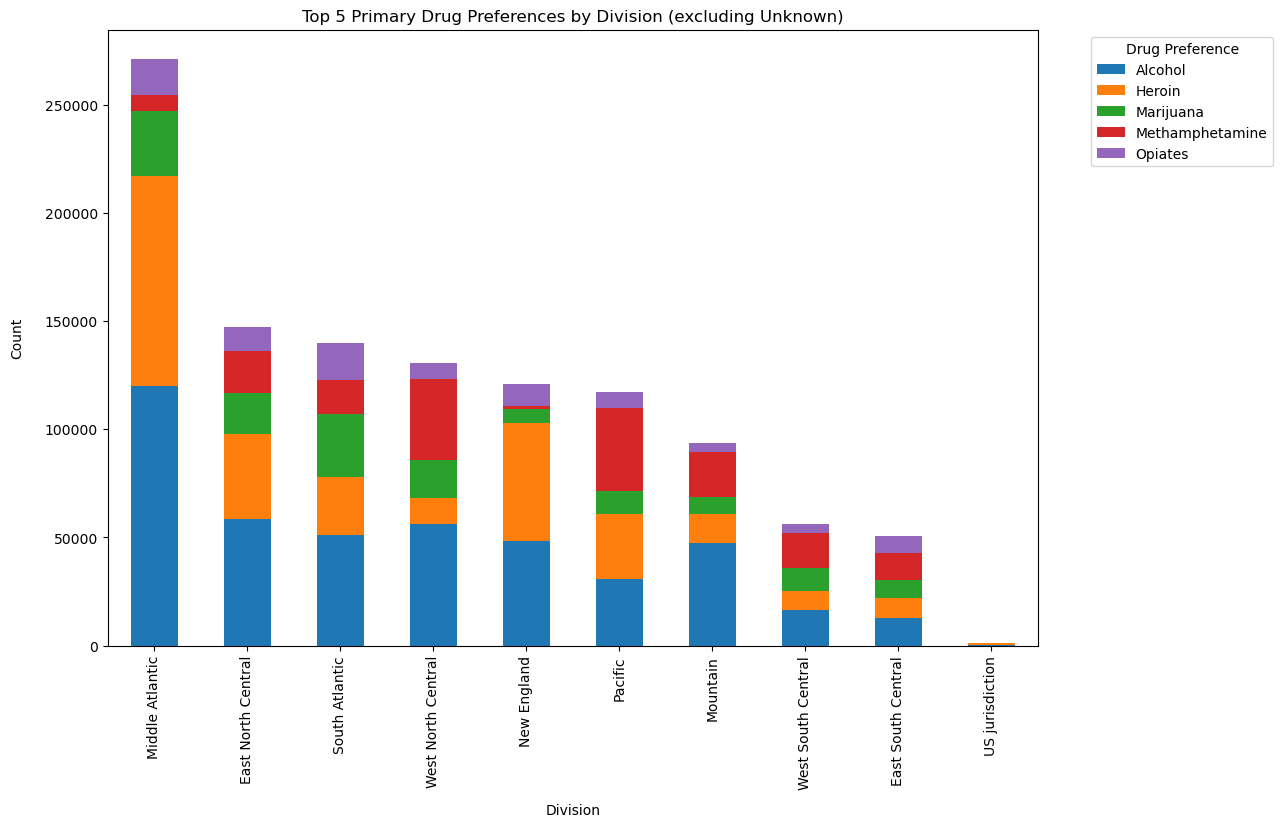

In [63]:
# Select the top 5 drugs
top_drugs = df['Primary_Drug_Preference'].value_counts().head(6).index

# Filter the dataframe for the top 5 drugs
df_top_drugs = df[(df['Primary_Drug_Preference'].isin(top_drugs)) & (df['Primary_Drug_Preference'] != 'Unknown')]

# Group by division and drug preference
grouped_data = df_top_drugs.groupby(['Location_by_division', 'Primary_Drug_Preference']).size().unstack(fill_value=0)

# Sort by division
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Bar chart
grouped_data.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Top 5 Primary Drug Preferences by Division (excluding Unknown)')
plt.xlabel('Division', labelpad=10)
plt.ylabel('Count', labelpad=15)
plt.legend(title='Drug Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


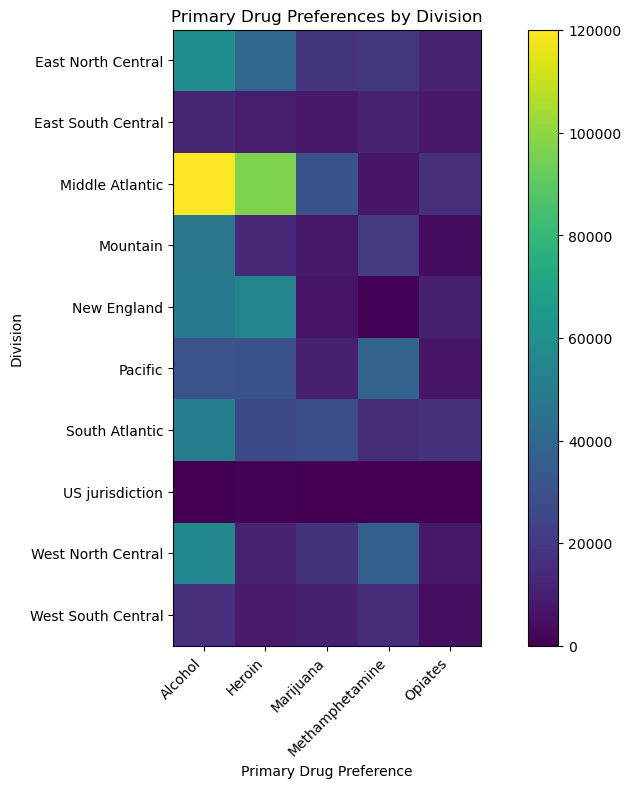

In [64]:
# Heatmap
top_drugs = df['Primary_Drug_Preference'].value_counts().head(6).index

# Filter the dataframe for the top 5 drugs and exclude 'Unknown'
df_top_drugs = df[(df['Primary_Drug_Preference'].isin(top_drugs)) & (df['Primary_Drug_Preference'] != 'Unknown')]

# Create a pivot table for the heatmap
heatmap_data = df_top_drugs.pivot_table(index='Location_by_division', columns='Primary_Drug_Preference', aggfunc='size', fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.imshow(heatmap_data, cmap='viridis', interpolation='nearest')

# Set axis labels and title
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns, rotation=45, ha='right')
ax.set_yticklabels(heatmap_data.index)
ax.set_xlabel('Primary Drug Preference')
ax.set_ylabel('Division')
ax.set_title('Primary Drug Preferences by Division')

# Add colorbar
cbar = fig.colorbar(cax)

plt.show()

In [ ]:
# STAT

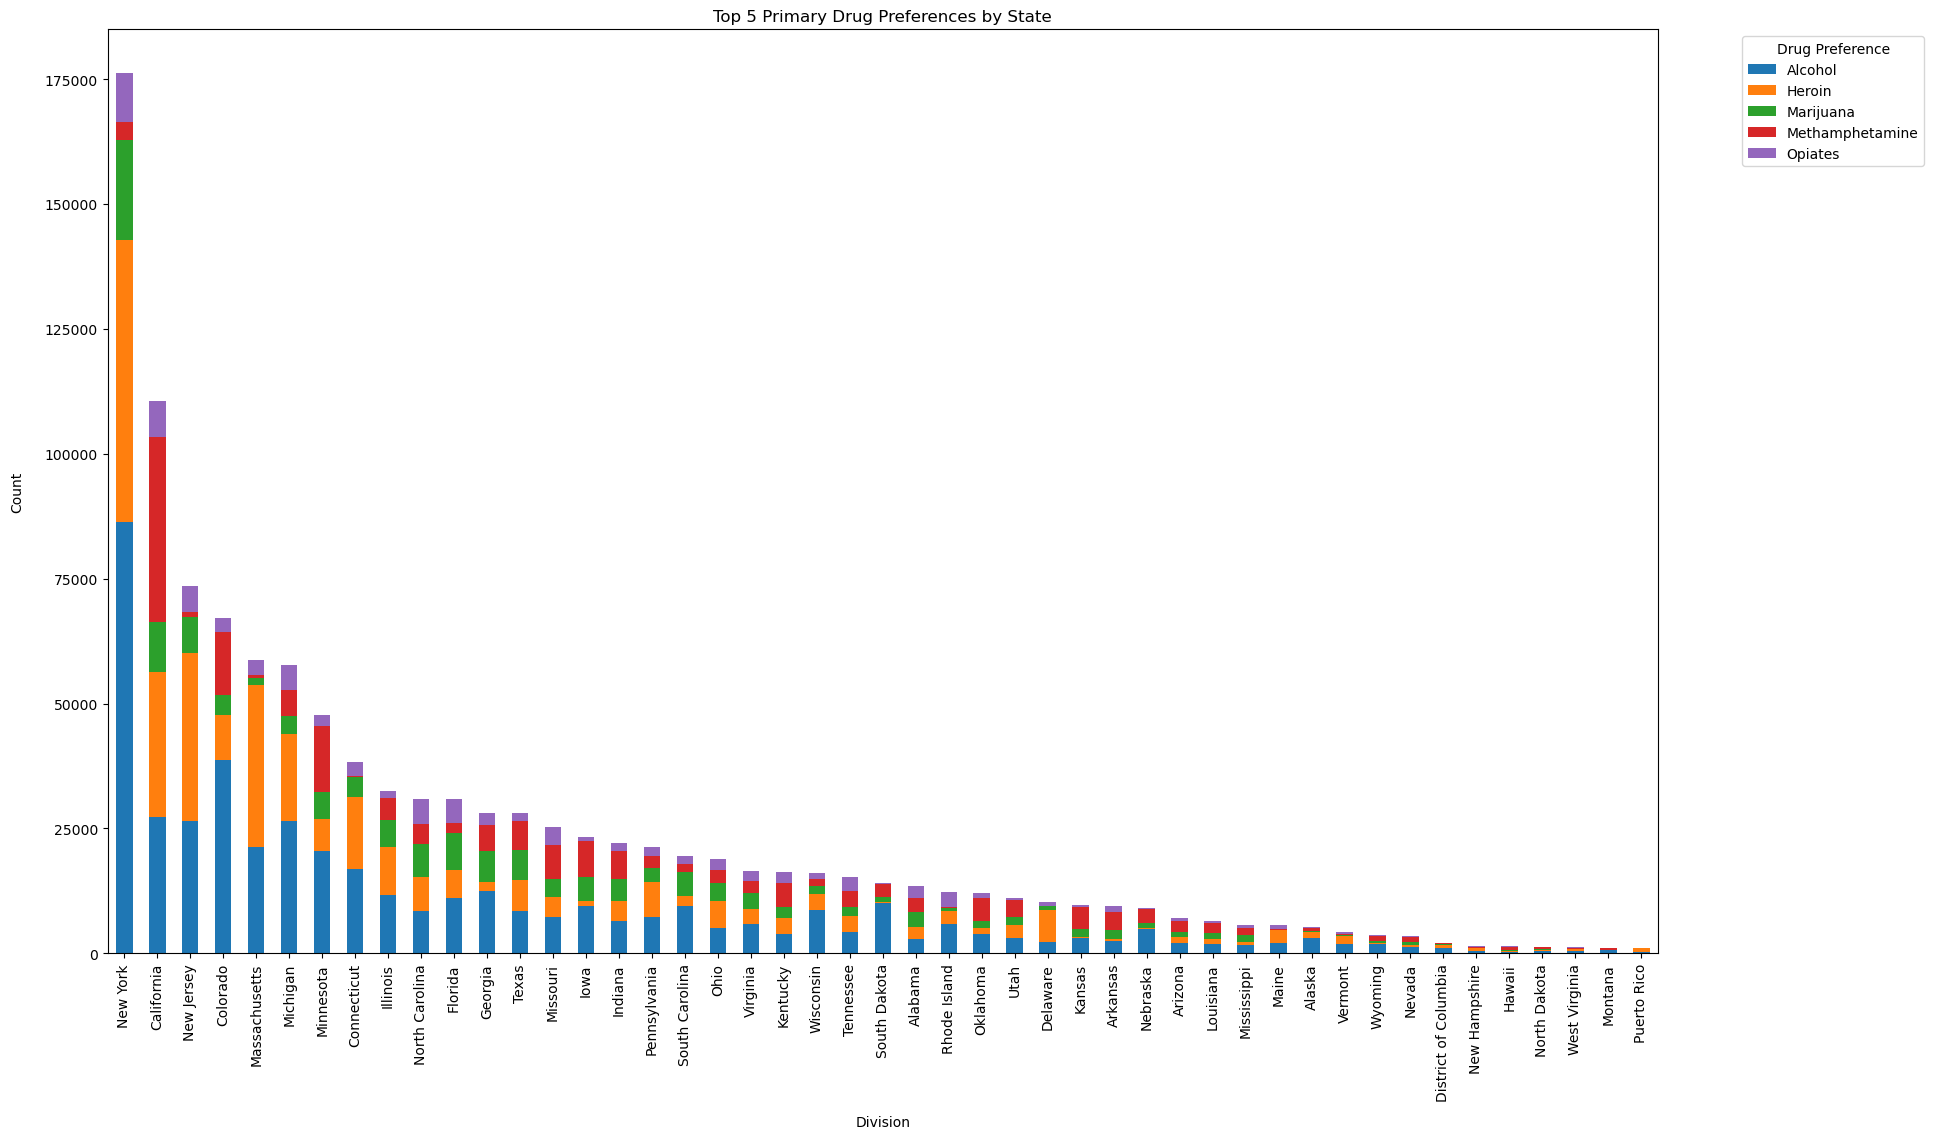

In [70]:
# Select the top 5 drugs
top_drugs = df['Primary_Drug_Preference'].value_counts().head(6).index

# Filter the dataframe for the top 5 drugs
df_top_drugs = df[(df['Primary_Drug_Preference'].isin(top_drugs)) & (df['Primary_Drug_Preference'] != 'Unknown')]

# Group by division and drug preference
grouped_data = df_top_drugs.groupby(['Location_by_state', 'Primary_Drug_Preference']).size().unstack(fill_value=0)

# Sort by division
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Bar chart
grouped_data.plot(kind='bar', figsize=(20, 12), stacked=True)
plt.title('Top 5 Primary Drug Preferences by State')
plt.xlabel('Division', labelpad=10)
plt.ylabel('Count', labelpad=15)
plt.legend(title='Drug Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

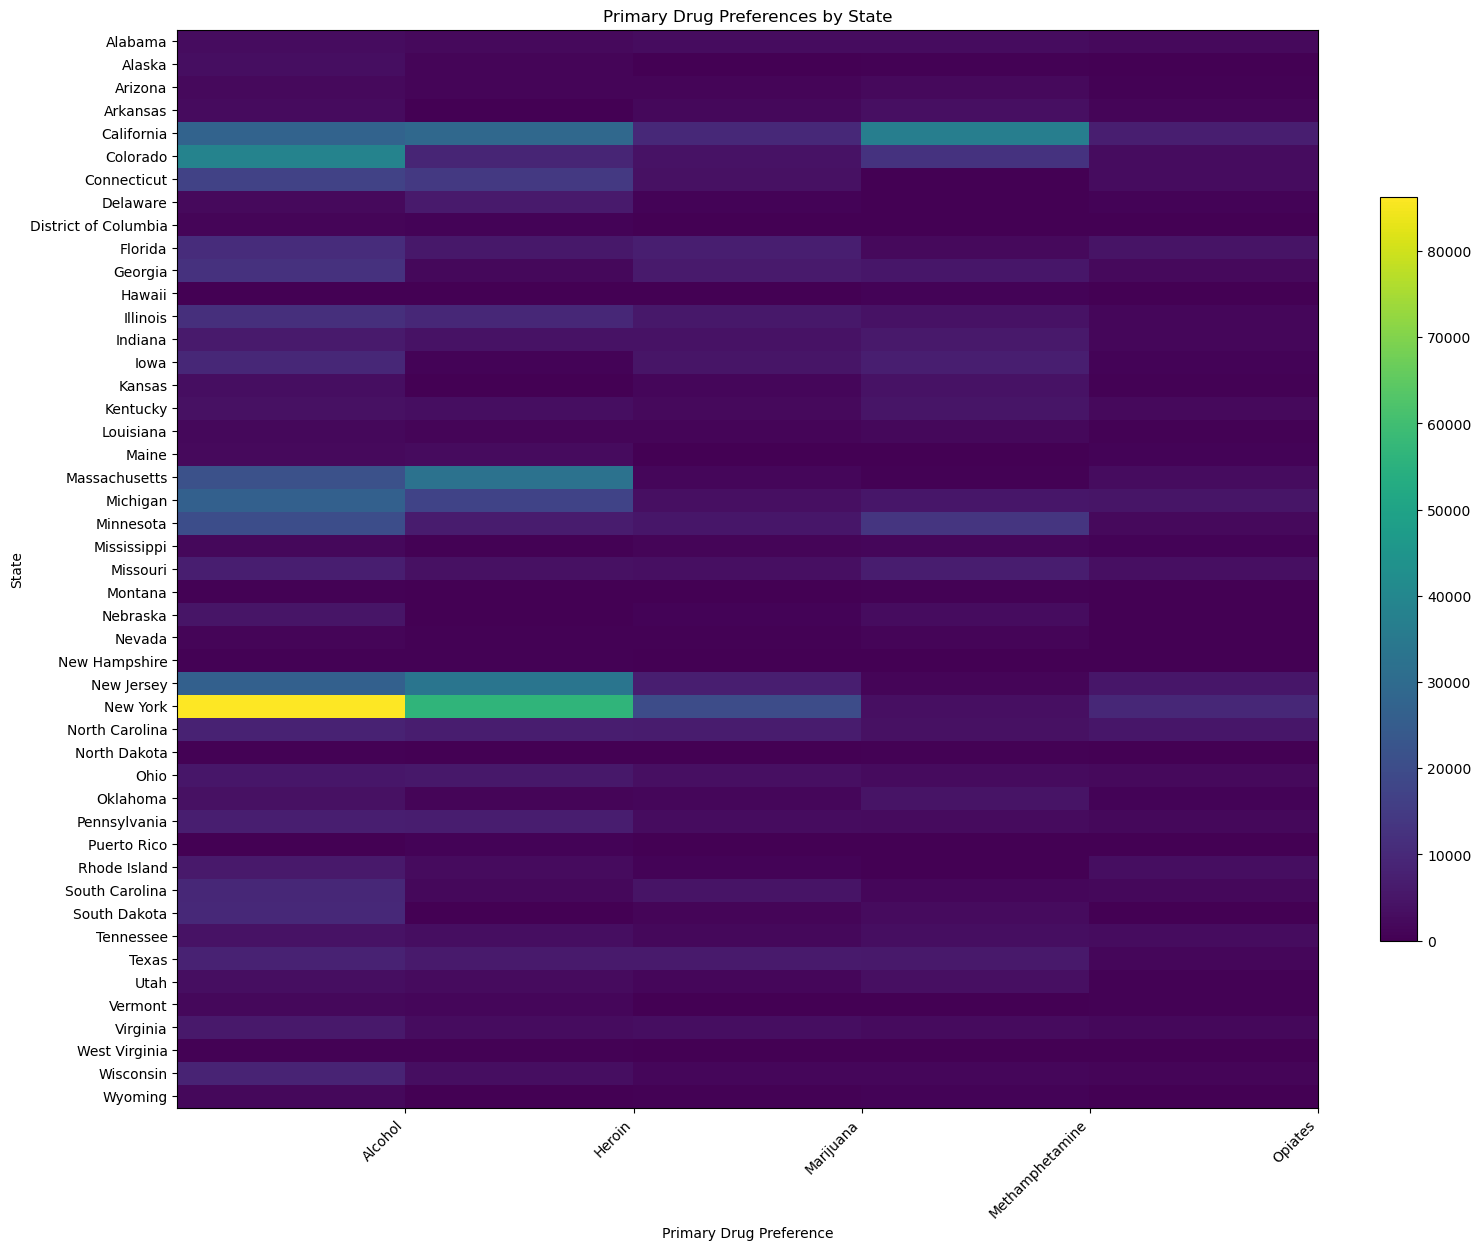

In [85]:
# Heatmap
top_drugs = df['Primary_Drug_Preference'].value_counts().head(6).index

# Filter the dataframe for the top 5 drugs and exclude 'Unknown'
df_top_drugs = df[(df['Primary_Drug_Preference'].isin(top_drugs)) & (df['Primary_Drug_Preference'] != 'Unknown')]

# Create a pivot table for the heatmap
heatmap_data = df_top_drugs.pivot_table(index='Location_by_state', columns='Primary_Drug_Preference', aggfunc='size', fill_value=0)

# Increase the figure size to make rows taller
fig, ax = plt.subplots(figsize=(16, 14))
cax = ax.imshow(heatmap_data, cmap='viridis', interpolation='nearest', aspect='auto')

# Set axis labels and title
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns, rotation=45, ha='right')

# Manually adjust the x-axis ticks and labels for increased spacing
ax.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
ax.set_xticklabels(heatmap_data.columns, rotation=45, ha='right')

ax.set_yticklabels(heatmap_data.index)
ax.set_xlabel('Primary Drug Preference')
ax.set_ylabel('State')
ax.set_title('Primary Drug Preferences by State')

# Add colorbar with increased width
cbar = fig.colorbar(cax, fraction=0.03)

plt.show()
